<a href="https://colab.research.google.com/github/mahilohiya/ml-projects/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Predict whether a transaction is fraudulent based on various features of the transaction. This is a binary classification problem where the target variable is Fraud, indicating whether a transaction is fraudulent (1) or legitimate (0).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
df = pd.read_csv('creditcard.csv')
df.head()


,TransactionID,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount,Fraud
0,1,2748.58,14.23,Travel,77,Female,37407,Suburban,1,1
1,2,3578.79,0.24,Travel,34,Male,197616,Suburban,0,0
2,3,3017.79,11.42,Travel,43,Female,114748,Urban,3,1
3,4,2728.97,17.01,Travel,75,Female,96347,Rural,4,1
4,5,2124.04,1.06,Online,48,Male,151085,Suburban,3,1


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        5 non-null      int64  
 1   TransactionAmount    5 non-null      float64
 2   TransactionTime      5 non-null      float64
 3   MerchantCategory     5 non-null      object 
 4   CustomerAge          5 non-null      int64  
 5   CustomerGender       5 non-null      object 
 6   CustomerIncome       5 non-null      int64  
 7   TransactionLocation  5 non-null      object 
 8   PreviousFraudCount   5 non-null      int64  
 9   Fraud                5 non-null      int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 532.0+ bytes


,TransactionID,TransactionAmount,TransactionTime,CustomerAge,CustomerIncome,PreviousFraudCount,Fraud
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,2839.634000,8.792000,55.400000,119440.600000,2.200000,0.800000
std,1.581139,526.949542,7.696335,19.475626,59995.015629,1.643168,0.447214
min,1.000000,2124.040000,0.240000,34.000000,37407.000000,0.000000,0.000000
25%,2.000000,2728.970000,1.060000,43.000000,96347.000000,1.000000,1.000000
50%,3.000000,2748.580000,11.420000,48.000000,114748.000000,3.000000,1.000000
75%,4.000000,3017.790000,14.230000,75.000000,151085.000000,3.000000,1.000000
max,5.000000,3578.790000,17.010000,77.000000,197616.000000,4.000000,1.000000


In [7]:
df.isnull().sum()

,0
TransactionID,0
TransactionAmount,0
TransactionTime,0
MerchantCategory,0
CustomerAge,0
CustomerGender,0
CustomerIncome,0
TransactionLocation,0
PreviousFraudCount,0
Fraud,0


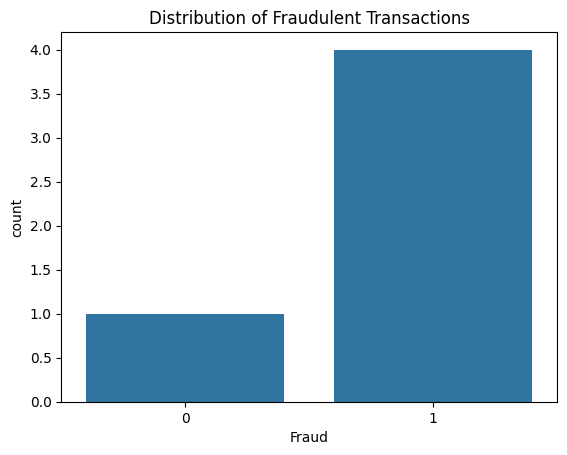

In [8]:
#distribution of target variable

sns.countplot(x ='Fraud' , data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

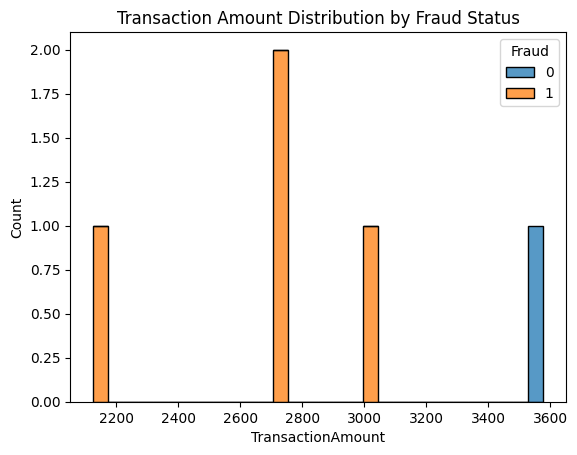

In [10]:
#distribution of transaction amount by fraud status

sns.histplot(data=df, x='TransactionAmount', hue='Fraud', multiple='stack',bins=30)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()

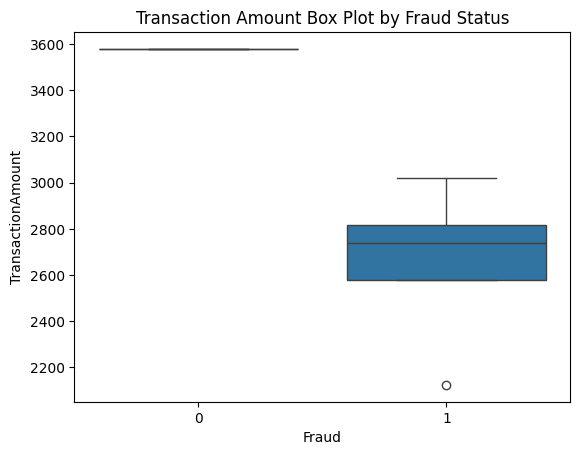

In [11]:
#box plot for transaction amount by Fraud Status

sns.boxplot(data=df, x='Fraud', y='TransactionAmount')
plt.title('Transaction Amount Box Plot by Fraud Status')
plt.show()

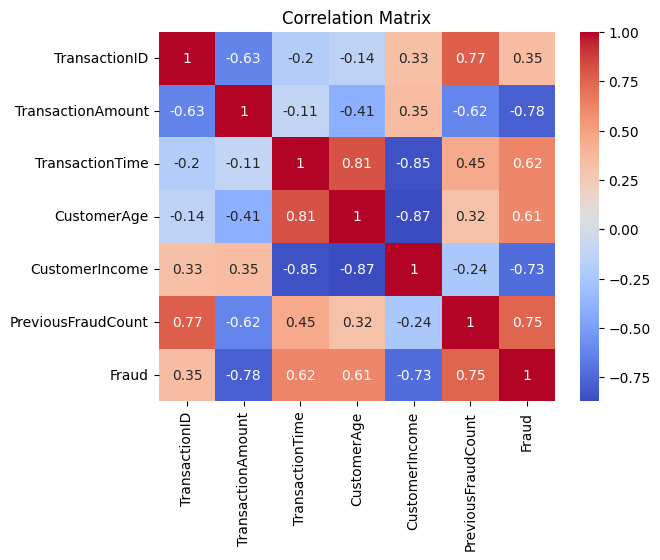

In [15]:
#correaltion
num_cols = list()

for col in df.columns:
    if df[col].dtype != object:
        num_cols.append(col)

corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
#data preprocessing
label_encoders = {}
for column in ['MerchantCategory','CustomerGender', 'TransactionLocation']:
  le = LabelEncoder()
  df[column] =le.fit_transform(df[column])
  label_encoders[column] = le

x = df.drop(['TransactionID', 'Fraud'], axis=1)
y = df['Fraud']

In [13]:
x.head()

,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount
0,2748.58,14.23,1,77,0,37407,1,1
1,3578.79,0.24,1,34,1,197616,1,0
2,3017.79,11.42,1,43,0,114748,2,3
3,2728.97,17.01,1,75,0,96347,0,4
4,2124.04,1.06,0,48,1,151085,1,3


In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 100.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

